In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Init a built-in cartpole environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

In [3]:
# Reset the environment to start
observation, info = env.reset()
print(f"Initial observation: {observation}")
print(f"Info: {info}")

Initial observation: [ 0.03603238 -0.02370906 -0.03156086 -0.04731936]
Info: {}


In [4]:
# There are only two actions for the cartpole
action_map = {0: 'push left', 1: 'push right'}

In [5]:
# Take up to 200 random actions

# Collect frames for replay
frames = []
for step in range(200):
    frame = env.render() # render current state
    frames.append(frame)

    # Choose a random action (0 = push left, 1 = push right)
    action = env.action_space.sample()

    print(f"Step {step}: Taking action {action} ({action_map[action]}).")

    # Take the action
    observation, reward, terminated, truncated, info = env.step(action)

    print(f"  Observation: {observation}")
    print(f"  Reward: {reward}")
    print(f"  Terminated: {terminated} (pole fell)")
    print(f"  Truncated: {truncated} (time limit reached)")

    # Check if episode is done
    # If pole angle exceeds +/- 12, the episode automatically terminates
    if terminated or truncated:
        print("\nEpisode finished!")
        print(f"Final observation: {observation}")
        break

    env.close()

/home/eric/.cache/pypoetry/virtualenvs/rl-fundamental-iovhCHDa-py3.10/lib/python3.10/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name


Step 0: Taking action 0 (push left).
  Observation: [ 0.0355582  -0.21836457 -0.03250725  0.23524114]
  Reward: 1.0
  Terminated: False (pole fell)
  Truncated: False (time limit reached)
Step 1: Taking action 0 (push left).
  Observation: [ 0.03119091 -0.41300735 -0.02780242  0.51749563]
  Reward: 1.0
  Terminated: False (pole fell)
  Truncated: False (time limit reached)
Step 2: Taking action 0 (push left).
  Observation: [ 0.02293076 -0.60772705 -0.01745251  0.8012894 ]
  Reward: 1.0
  Terminated: False (pole fell)
  Truncated: False (time limit reached)
Step 3: Taking action 1 (push right).
  Observation: [ 0.01077622 -0.41237012 -0.00142672  0.50316787]
  Reward: 1.0
  Terminated: False (pole fell)
  Truncated: False (time limit reached)
Step 4: Taking action 0 (push left).
  Observation: [ 0.00252882 -0.60747194  0.00863663  0.79540086]
  Reward: 1.0
  Terminated: False (pole fell)
  Truncated: False (time limit reached)
Step 5: Taking action 1 (push right).
  Observation: [-0.00

ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2721:(snd_pcm_open_noupdate) Unknown PCM default


In [6]:
from IPython.display import HTML
from matplotlib import animation

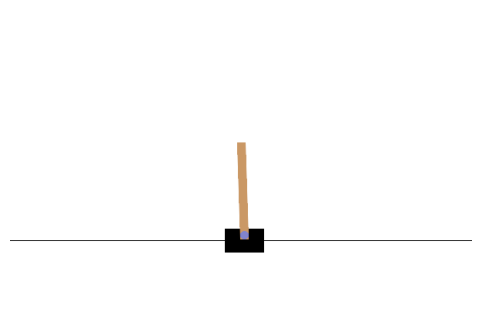

In [7]:
fig = plt.figure(figsize=(6, 4))
plt.axis('off')
im = plt.imshow(frames[0])

In [8]:
def animate(i):
    im.set_array(frames[i])
    return [im]

In [9]:
# Add frames into animation
anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=1)

In [10]:
HTML(anim.to_jshtml())

In [11]:
# Click the "play" botton to replay
# use "-" botton to decrease speed